# Bachelor-Notebook

### Data sources:
- [Games_of_all_time.csv](https://www.kaggle.com/datasets/xcherry/games-of-all-time-from-metacritic)
- [metacritic_games.csv](https://www.kaggle.com/datasets/skateddu/metacritic-all-time-games-stats)


In [87]:
#Initialisiert die benötigten Libraries
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 

Code der Stata in Phython "aktiviert" 
von: https://www.stata.com/python/pystata/install.html 

In [88]:
import sys
#sys.path.append('/Applications/Stata/utilities')           #Apple Pfad
sys.path.append('C:/Program Files/Stata17/utilities')       #Windows Pfad
from pystata import config
config.init('mp')

# 1. Einlesen der Daten

In [89]:
#Erstellt einen DataFrame (Tabelle) anhand der csv-Datei
metacrit_data = pd.read_csv(r"data/games_of_all_time.csv")

In [90]:
#Erstellt einen DataFrame (Tabelle) anhand der csv-Datei
releasedata = pd.read_csv(r"data/metacritic_games.csv")

In [91]:
#Zeigt den DataFrame der games_of_all_time.csv Datei
#ACHTUNG!!!: Es wird empfohlen, die Darstellung des Dataframes auf html zu verändern. Dafür muss der Code in dieser Zeile ausgeführt werden, auf die drei Punkte links oben vom Output geklickt werden, dann "Change Presentation" ausgewählt werden und dann bei der sich öffnenden Option "text/html" ausgewählt werden. Dies ermöglicht eine einfachere Darstellungsweise der Daten.
metacrit_data

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+
...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",https://www.metacritic.com/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,https://www.metacritic.com/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,https://www.metacritic.com/game/xbox-one/ooo-a...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",https://www.metacritic.com/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",NaN,E


In [92]:
#Zeigt den DataFrame der metacritic_games.csv Datei
releasedata

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command & Conquer,PC,Westwood Studios,Virgin Interactive,Sci-Fi,1-4,T,NaN,"Aug 31, 1995",/game/pc/command-conquer,5,0,0,94,47,0,1,8.9
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,NaN,NaN,NaN,"Apr 30, 1995",/game/pc/full-throttle,6,2,0,86,18,1,0,8.7
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1-2,T,NaN,"Sep 9, 1995",/game/playstation/battle-arena-toshinden,1,3,0,69,1,0,1,5.8
3,Sid Meier's Civilization II,PC,MPS Labs,MicroProse,Strategy,1 Player,K-A,NaN,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0,94,46,0,1,8.9
4,Quake,PC,id Software,id Software,Action,1-16,M,NaN,"Jun 22, 1996",/game/pc/quake,9,0,0,94,84,4,1,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,ARK: Survival Evolved,Switch,Studio Wildcard,Studio Wildcard,Action Adventure,Online Multiplayer,T,NaN,"Nov 30, 2018",/game/switch/ark-survival-evolved,0,1,11,29,4,0,5,2.4
20418,Wild West Online,PC,NaN,NaN,Role-Playing,Online Multiplayer,NaN,NaN,"May 10, 2018",/game/pc/wild-west-online,0,0,8,29,0,0,9,0.4
20419,The Quiet Man,PS4,"Square Enix, Human Head Studios",Square Enix,Action Adventure,No Online Multiplayer,M,NaN,"Nov 1, 2018",/game/playstation-4/the-quiet-man,1,0,20,28,5,0,19,2.1
20420,Awkward,Switch,Snap Finger Click Ltd,Snap Finger Click Ltd,Miscellaneous,No Online Multiplayer,M,NaN,"Jul 5, 2018",/game/switch/awkward,0,0,4,28,0,0,2,tbd


# 2. Hauptdatensatz:

### 2.1. Erstellung des Datensatzes:

In [93]:
#Anpassung der "URL" Spalte an die "Link" Spalte des release_data - Datensatzes um ein zusammenfügen anhand der einzigartigen Internet-Adresse zu ermöglichen.
metacrit_data.url = metacrit_data.url.str.replace("https://www.metacritic.com/", "/")
#metacrit_data

C:\Users\Marek\AppData\Local\Temp/ipykernel_18596/1848361479.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  metacrit_data.url = metacrit_data.url.str.replace("https://www.metacritic.com/", "/")


In [94]:
#Erstellung eines neuen Datensatzes mit den Spalten des releasedata-Datensatzes, welche mit dem Main-Datensatzes gemerged werden sollen
releasedata_mergeprep= releasedata[["publisher", "release_date", "link"] ].copy()
#releasedata_mergeprep

In [95]:
#Merge die Ausgewählten Spalten des releasedata-Datensatzes mit dem Main-Datensatz anhand der "URL" und "LINK" Spalte. Fehlende Werte werden als 0 eingetragen.
metacrit_data = pd.merge(metacrit_data, releasedata_mergeprep, left_on=["url"], right_on=["link"], how="left").fillna(0)
#metacrit_data

In [96]:
#Entfernt die link- und url-Spalte aus dem Datensatz, da diese nicht mehr benötigt werden
metacrit_data.drop(columns=["link"], inplace=True)
metacrit_data.drop(columns=["url"], inplace=True)

### 2.2. Anpassungen

##### 2.2.1. Genre Aufsplittung

In [97]:
#Gibt an wie Häufig maximal ein "," in der Spalte "genre" vorkommt. Davon lässt sich ableiten, wie viele unterschiedliche Genres maximal in einer bestimmten Zelle stehen. (In diesem Falle sind es 10)
metacrit_data["genre"].str.count(",").max()

9.0

In [98]:
#Aufsplittung der Genre Spalte in einzelne Spalten für einfachere Übersicht. Da zuvor herausgefunden wurde, dass 10 die maximale Genre Anzahl ist, werden 10 Spalten genutzt. (Ebenfalls mit 9 und 11 Spalten getestet. Fehlercode: "Columns must be same length as key". 10 als maximale Genre Anzahl bestätigt )
metacrit_data[["genre1","genre2","genre3","genre4","genre5","genre6","genre7","genre8","genre9", "genre10"]] = metacrit_data["genre"].str.split(",", expand=True) 
metacrit_data

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,publisher,...,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,Nintendo,...,['Action Adventure','Fantasy'],None,None,None,None,None,None,None,None
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,['Action','Platformer','3D'],None,None,None,None,None,None,None
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,['Action','Platformer','3D'],None,None,None,None,None,None,None
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,Nintendo,...,['Action','Shooter','First-Person','Sci-Fi'],None,None,None,None,None,None
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,Nintendo,...,['Action','Platformer','3D'],None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,Namco,...,['Action','Shooter','Third-Person','Modern'],None,None,None,None,None,None
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,Deep Silver,...,['Driving','Racing','Arcade','Automobile'],None,None,None,None,None,None
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,Extra Mile Studios,...,['Action','General','Arcade'],None,None,None,None,None,None,None
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",THQ,"['Miscellaneous', 'General']",0,E,THQ,...,['Miscellaneous','General'],None,None,None,None,None,None,None,None


In [99]:
#Löscht ungewünschte Zeichen aus den entsprechenden genre Spalten
x=1
chars="[],' "
while x<11:
    for c in chars:
        metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].str.replace(c, "")
    x=x+1

C:\Users\Marek\AppData\Local\Temp/ipykernel_18596/2132432586.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].str.replace(c, "")


##### 2.2.2. Niche Width-Spalte:

In [100]:
#Erstellt neue Spalte mit dem Namen "niche_width". Setzt alle Einträge gleich 0
metacrit_data["niche_width"]=0
metacrit_data

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,publisher,...,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,niche_width
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,Nintendo,...,Fantasy,None,None,None,None,None,None,None,None,0
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,Platformer,3D,None,None,None,None,None,None,None,0
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,Platformer,3D,None,None,None,None,None,None,None,0
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,Nintendo,...,Shooter,First-Person,Sci-Fi,None,None,None,None,None,None,0
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,Nintendo,...,Platformer,3D,None,None,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,Namco,...,Shooter,Third-Person,Modern,None,None,None,None,None,None,0
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,Deep Silver,...,Racing,Arcade,Automobile,None,None,None,None,None,None,0
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,Extra Mile Studios,...,General,Arcade,None,None,None,None,None,None,None,0
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",THQ,"['Miscellaneous', 'General']",0,E,THQ,...,General,None,None,None,None,None,None,None,None,0


In [101]:
#Passt die Spalte "niche_width" mit der entsprechenden Anzahl an Genres die ein einzelnes Spiel aufweist an.
x=1
while x<11:
    metacrit_data.loc[(metacrit_data[("genre"+str(x))].notnull()), "niche_width"]=x #Überprüft jede "genre1-10" Spalte, ob ein Wert eingetragen ist. Solange ein Wert (ein String) erkannt wird erhöht sich x um eins. Sobald kein Wert erkannt wird, wird x als niche_width Wert eingesetzt. 
    x=x+1
    print(metacrit_data["niche_width"].value_counts())

1    8827
0       4
Name: niche_width, dtype: int64
2    8826
0       4
1       1
Name: niche_width, dtype: int64
3    6441
2    2385
0       4
1       1
Name: niche_width, dtype: int64
4    3579
3    2862
2    2385
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1606
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     339
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      96
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      74
8      22
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      74
8      19
0       4
9       3
1       1
Name: niche_width, dtype: int64
3     2862
2     2385
4     1973
5     1267
6      243
7       74
8       19
0        4
9        2
1        1
10       1
Name: niche_width, dtype: int64


##### 2.2.3. Platform Width-Spalte:

In [102]:
#Gibt an wie Häufig maximal ein "," in der Spalte "platform" vorkommt. Davon lässt sich ableiten, wie viele unterschiedliche Platformen maximal in einer bestimmten Zelle stehen. (In diesem Falle 9)
metacrit_data["platform"].str.count(",").max()

8

In [103]:
#Aufsplittung der platform Spalte in einzelne Spalten für Rechnung:
metacrit_data[["platform1","platform2","platform3","platform4","platform5","platform6","platform7","platform8","platform9"]] = metacrit_data["platform"].str.split(",", expand=True) 
#metacrit_data

In [104]:
#Erstellt neue Spalte mit dem Namen "platform_width"
metacrit_data["platform_width"]=0
#metacrit_data

In [105]:
# Passt die Spalte "platform_width" mit der entsprechenden Anzahl an Platformen die ein einzelnes Spiel aufweist an
x=1
while x<10:
    metacrit_data.loc[(metacrit_data[("platform"+str(x))].notnull()), "platform_width"]=x
    x=x+1
    print(metacrit_data["platform_width"].value_counts())

1    8831
Name: platform_width, dtype: int64
1    6581
2    2250
Name: platform_width, dtype: int64
1    6581
2    1538
3     712
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     184
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      47
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       9
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       6
7       3
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
8       1
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
9       1
Name: platform_width, dtype: int64


In [106]:
#Löscht die einzelnen Platform Spalten, da diese nicht mehr benötigt werden und den Datensatz unübersichtlicher machen
x=1
while x<10:
    metacrit_data.drop(columns=[("platform"+str(x))], inplace=True)
    x=x+1
#metacrit_data

##### 2.2.4. Veröffentlichungsjahr-Spalte

In [107]:
# Trennt die "release_date" Spalte in eine Datums und Jahres Spalte auf.
metacrit_data[["date","year"]] = metacrit_data["release_date"].str.split(",", expand=True) 

In [108]:
#Löscht die Datums Spalte, da nur das Jahr benötigt wird
metacrit_data.drop(columns=["date"], inplace=True)

In [109]:
metacrit_data["year"].dtypes

dtype('O')

In [110]:
#Ändert den Datentyp der Jahres Spalte von "object" in "float64", damit rechnungen möglich werden. 
metacrit_data["year"]= pd.to_numeric(metacrit_data["year"])
metacrit_data["year"].dtypes

dtype('float64')

##### 2.2.5. Fehlende Werte:

In [111]:
# Gibt einen Überblick über die fehlenden Werte (bzw. die nicht fehlenden Werte: non-null)
metacrit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_name       8831 non-null   object 
 1   meta_score      8831 non-null   float64
 2   user_score      8831 non-null   float64
 3   platform        8831 non-null   object 
 4   description     8831 non-null   object 
 5   developer       8831 non-null   object 
 6   genre           8831 non-null   object 
 7   type            8831 non-null   object 
 8   rating          8831 non-null   object 
 9   publisher       8831 non-null   object 
 10  release_date    8831 non-null   object 
 11  genre1          8827 non-null   object 
 12  genre2          8826 non-null   object 
 13  genre3          6441 non-null   object 
 14  genre4          3579 non-null   object 
 15  genre5          1606 non-null   object 
 16  genre6          339 non-null    object 
 17  genre7          96 non-null     o

In [112]:
#Zeigt das es 4 Fälle mit 0 Genres gibt.  
metacrit_data["niche_width"].value_counts()
#0 wird in der niche_width Spalte als fehlender Wert gesetzt:
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(0, np.nan)

In [113]:
#Jedes Spiel ist minimal auf einer Platform verfügbar. (Keine Fehlenden Werte)
metacrit_data["platform_width"].value_counts()

1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
9       1
Name: platform_width, dtype: int64

In [114]:
#Jedes Spiel hat eine Jahreszahl zugewiesen bekommen. (Keine Fehlenden Werte bzw. fehlende Werte wurden bereits definiert)
metacrit_data["year"].value_counts()

2018.0    498
2017.0    473
2016.0    458
2009.0    454
2008.0    438
2007.0    420
2015.0    419
2006.0    406
2011.0    401
2010.0    381
2002.0    381
2005.0    375
2012.0    374
2003.0    371
2014.0    365
2013.0    355
2004.0    345
2001.0    283
2000.0    200
1998.0     33
1999.0     33
1997.0     20
1996.0     16
1995.0      1
Name: year, dtype: int64

In [115]:
#Gibt die Summe der fehlenden Werte für die year-Spalte an
sum(metacrit_data["year"].isnull())

1331

In [116]:
#In der jeweiligen Spalte wird 0 als fehlender Wert gesetzt
metacrit_data["publisher"]=metacrit_data["publisher"].replace(0, np.nan)
metacrit_data["release_date"]=metacrit_data["release_date"].replace(0, np.nan)


In [117]:
metacrit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_name       8831 non-null   object 
 1   meta_score      8831 non-null   float64
 2   user_score      8831 non-null   float64
 3   platform        8831 non-null   object 
 4   description     8831 non-null   object 
 5   developer       8831 non-null   object 
 6   genre           8831 non-null   object 
 7   type            8831 non-null   object 
 8   rating          8831 non-null   object 
 9   publisher       7498 non-null   object 
 10  release_date    7500 non-null   object 
 11  genre1          8827 non-null   object 
 12  genre2          8826 non-null   object 
 13  genre3          6441 non-null   object 
 14  genre4          3579 non-null   object 
 15  genre5          1606 non-null   object 
 16  genre6          339 non-null    object 
 17  genre7          96 non-null     o

In [118]:
#Maximalwert und Minimalwert liegen zwichen 0 und 100. Aufgrund von des float64-Spaltentypes können so fehlende Werte ausgeschlossen werden.
print(metacrit_data["meta_score"].max())
print(metacrit_data["meta_score"].min())

99.0
11.0


In [119]:
#Maximalwert und Minimalwert liegen zwichen 0 und 100. Aufgrund von des float64-Spaltentypes können so fehlende Werte ausgeschlossen werden. 
print(metacrit_data["user_score"].max())
print(metacrit_data["user_score"].min())

98.0
2.0


In [120]:
#Entfernt alle nicht weiter benötigten Spalten
metacrit_data.drop(columns=["description", "rating", "type"], inplace=True)


##### 2.2.6. überprüfung der Daten:

In [121]:
#Dies ist der genutze Code um den zufälligen Datensatz zu gorben überprüfung zu erstellen. Der Code wurde aus-kommentiert, da bei einer erneuten durchführung neue zufällige Fälle ausgewählt würden     
    #Zeigt Ausschnitt aus dem Datensatz an. 
    #metacrit_data_random=metacrit_data.sample(n=30)
    #Speichert den Dataframe als Excel Datei ab
    #metacrit_data_random.to_excel("data/Random_Data.xlsx")

In [122]:
#Liest den zufälligen Datensatz wieder als DataFrame ein, um ihn anzeigen zu können.
metacrit_data_random = pd.read_excel(r"data/Random_Data.xlsx")
metacrit_data_random

,Unnamed: 0,game_name,meta_score,user_score,platform,description,url,developer,genre,type,...,genre4,genre5,genre6,genre7,genre8,genre9,genre10,niche_width,platform_width,year
0,53,Homeworld,93.00,88.0,['pc'],"Deported to a harsh desert world, exiles have ...",/game/pc/homeworld,Relic,"['Strategy', 'Real-Time', 'Sci-Fi', 'General',...",multiplayer,...,General,Command,NaN,NaN,NaN,NaN,NaN,5,1,1999.0
1,5091,Dark Souls II: Crown of the Sunken King,81.67,78.7,"['playstation-3', 'pc', 'xbox-360']",Embark on a journey to reclaim a crown that Dr...,/game/playstation-3/dark-souls-ii-crown-of-the...,Namco Bandai Games,"['Role-Playing', 'Action RPG']",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2014.0
2,188,NieR: Automata - Become as Gods Edition,90.00,90.0,['xbox-one'],NieR: Automata is an action RPG set in a post-...,/game/xbox-one/nier-automata---become-as-gods-...,PlatinumGames,"['Role-Playing', 'Action RPG']",singleplayer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2018.0
3,1952,Darkstalkers Chronicle: The Chaos Tower,74.00,79.0,['psp'],"(Also known as ""Vampire Chronicle"") Darkstalk...",/game/psp/darkstalkers-chronicle-the-chaos-tower,Capcom,"['Action', 'Fighting', '2D']",multiplayer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2005.0
4,4253,Alone in the Dark: Illumination,19.00,13.0,['pc'],A dire curse has shrouded the town of Lorwich ...,/game/pc/alone-in-the-dark-illumination,Pure FPS,"['Horror', 'Action Adventure', 'Survival']",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2015.0
5,4870,Catherine: Full Body,80.50,82.0,"['playstation-4', 'switch']",Dark. Intense. Intoxicating. Our indecisive pr...,/game/playstation-4/catherine-full-body,Atlus,"['Action Adventure', 'Survival']",multiplayer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
6,4425,Arcade Classics Anniversary Collection,62.00,44.5,"['playstation-4', 'switch']",This collection includes 8 arcade masterpieces...,/game/playstation-4/arcade-classics-anniversar...,Konami,"['Miscellaneous', 'Compilation']",singleplayer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
7,7892,Superliminal,77.25,85.7,"['playstation-4', 'xbox-one', 'switch', 'pc']",Perception is reality. Escape from a mind-bend...,/game/playstation-4/superliminal,Pillow Castle Games,"['Adventure', '3D', 'First-Person']",singleplayer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,NaN
8,8034,The Darkness,81.00,79.0,"['xbox-360', 'playstation-3']",The Darkness features a distinct blend of dark...,/game/xbox-360/the-darkness,Starbreeze,"['Action', 'Shooter', 'First-Person', 'Modern'...",multiplayer,...,Modern,Arcade,NaN,NaN,NaN,NaN,NaN,5,2,2007.0
9,3302,Happy Wars,61.00,70.0,['xbox-360'],Happy Wars is a casual multi-player action gam...,/game/xbox-360/happy-wars,Toylogic Inc.,"['Action', 'General']",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2012.0


# 3. Beschreibung des Datensatzes: 


### 3.1. Umgang mit Platformen

In [123]:
#Gibt die maximal vorkommende Häufigkeit eines Namens an. (Einmal für den Hauptdatensatz und einem für den releasedata-Datensatz)
print(metacrit_data["game_name"].value_counts().max())
print(releasedata["name"].value_counts().max())

1
10


In [124]:
#Gibt eine bestimmte Reihe anhand des Index-Wertes wieder
metacrit_data.loc[4425]

game_name         Arcade Classics Anniversary Collection
meta_score                                          62.0
user_score                                          44.5
platform                     ['playstation-4', 'switch']
developer                                         Konami
genre                   ['Miscellaneous', 'Compilation']
publisher                                            NaN
release_date                                         NaN
genre1                                     Miscellaneous
genre2                                       Compilation
genre3                                              None
genre4                                              None
genre5                                              None
genre6                                              None
genre7                                              None
genre8                                              None
genre9                                              None
genre10                        

### 3.2. Wichtige Variablen

In [125]:
#Zeigt die Spaltentitel an
metacrit_data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'developer',
       'genre', 'publisher', 'release_date', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10',
       'niche_width', 'platform_width', 'year'],
      dtype='object')

##### 3.2.1. Metascore

In [126]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [127]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["meta_score"].value_counts()

80.00    371
77.00    352
76.00    345
74.00    344
72.00    289
        ... 
96.80      1
76.75      1
44.50      1
50.50      1
46.67      1
Name: meta_score, Length: 297, dtype: int64

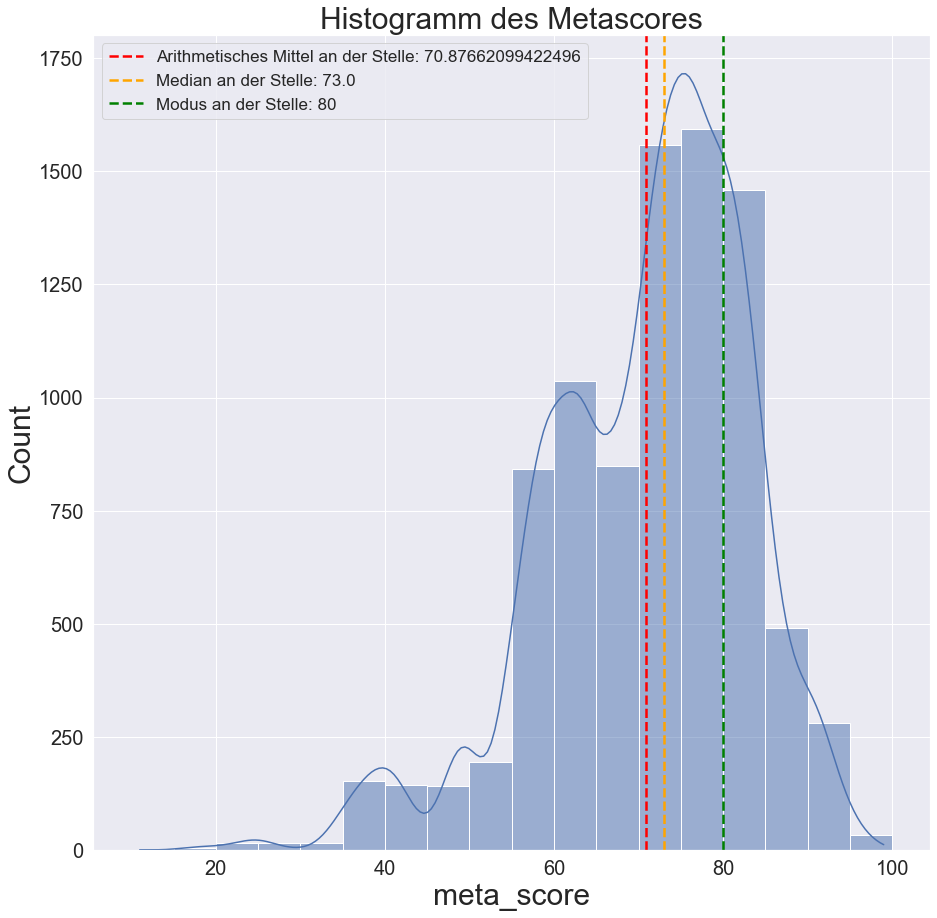

In [128]:
#Erstellt ein Histogram für die meta_score-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.meta_score, binwidth=5, binrange=[10,100], kde=True)              #Erstellt Histogram mit einer Balkenbreite von 5 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("meta_score", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["meta_score"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["meta_score"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["meta_score"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["meta_score"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=80,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 80")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper left', prop={'size': 17})
plt.title("Histogramm des Metascores", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_metascore.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [129]:
#Gibt den Interquartils-Abstand der meta_score-Spalte wieder
stats.iqr(metacrit_data["meta_score"])

17.0

In [130]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=17
Q3=80
Q1=63
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 105.5
Untere Whisker Grenze: 37.5
Unterer Grenzwert für Extremwerte: 12


In [131]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print(metacrit_data[(metacrit_data["meta_score"]<37.5)].shape)
print(metacrit_data[(metacrit_data["meta_score"]<12)].shape)

(130, 21)
(1, 21)


##### 3.2.2. Userscore

In [132]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [133]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["user_score"].value_counts()

77.0    316
75.0    300
76.0    289
78.0    286
73.0    264
       ... 
76.2      1
81.2      1
81.4      1
79.2      1
38.3      1
Name: user_score, Length: 301, dtype: int64

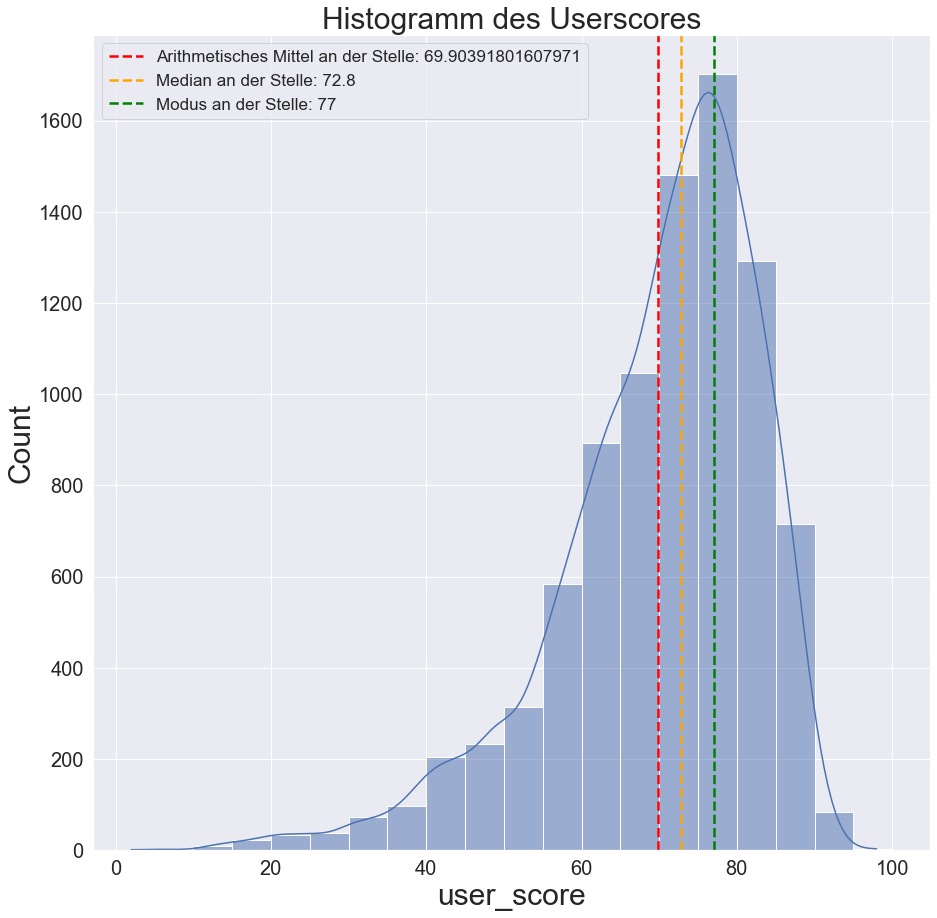

In [134]:
#Erstellt ein Histogram für die user_score-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.user_score, binwidth=5, binrange=[10,100], kde=True)              #Erstellt Histogram mit einer Balkenbreite von 5 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("user_score", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["user_score"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["user_score"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["user_score"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["user_score"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=77,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 77")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper left', prop={'size': 17})
plt.title("Histogramm des Userscores", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_userscore.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [135]:
#Gibt den Interquartils-Abstand der user_score-Spalte wieder
stats.iqr(metacrit_data["user_score"])

16.0

In [136]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=16
Q3=79
Q1=63
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 103.0
Untere Whisker Grenze: 39.0
Unterer Grenzwert für Extremwerte: 15


In [137]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print(metacrit_data[(metacrit_data["user_score"]<39)].shape)
print(metacrit_data[(metacrit_data["user_score"]<15)].shape)

(256, 21)
(13, 21)


##### 3.2.3. Erstellung eines gemeinsamen Boxplots

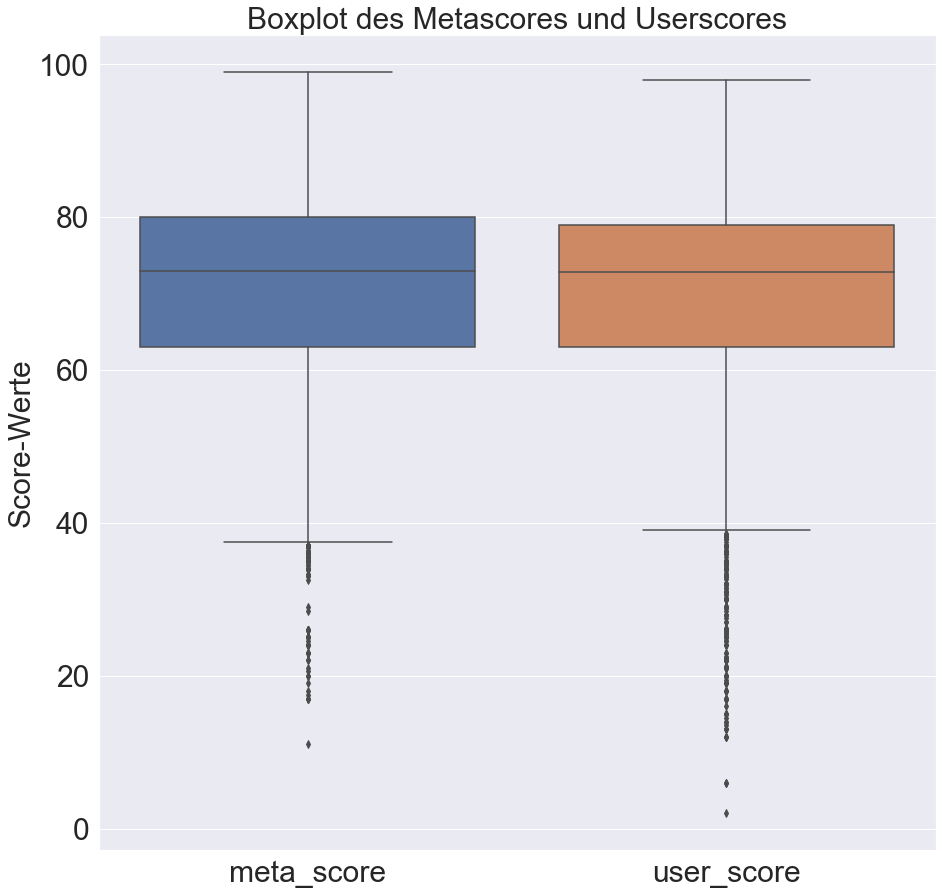

In [138]:
#Erstellt einen Boxplot für meta_score und user_score
sns.boxplot(data=metacrit_data[["meta_score", "user_score"]])                                                      
plt.ylabel("Score-Werte", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=30)                                    #Passt die größe der x und y Achse an
plt.title("Boxplot des Metascores und Userscores", size=30)                                  #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/boxplot_metascore_and_userscore.jpg")                                  #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


##### 3.2.4: Niche Width

In [139]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [140]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["niche_width"].value_counts()

3.0     2862
2.0     2385
4.0     1973
5.0     1267
6.0      243
7.0       74
8.0       19
9.0        2
1.0        1
10.0       1
Name: niche_width, dtype: int64

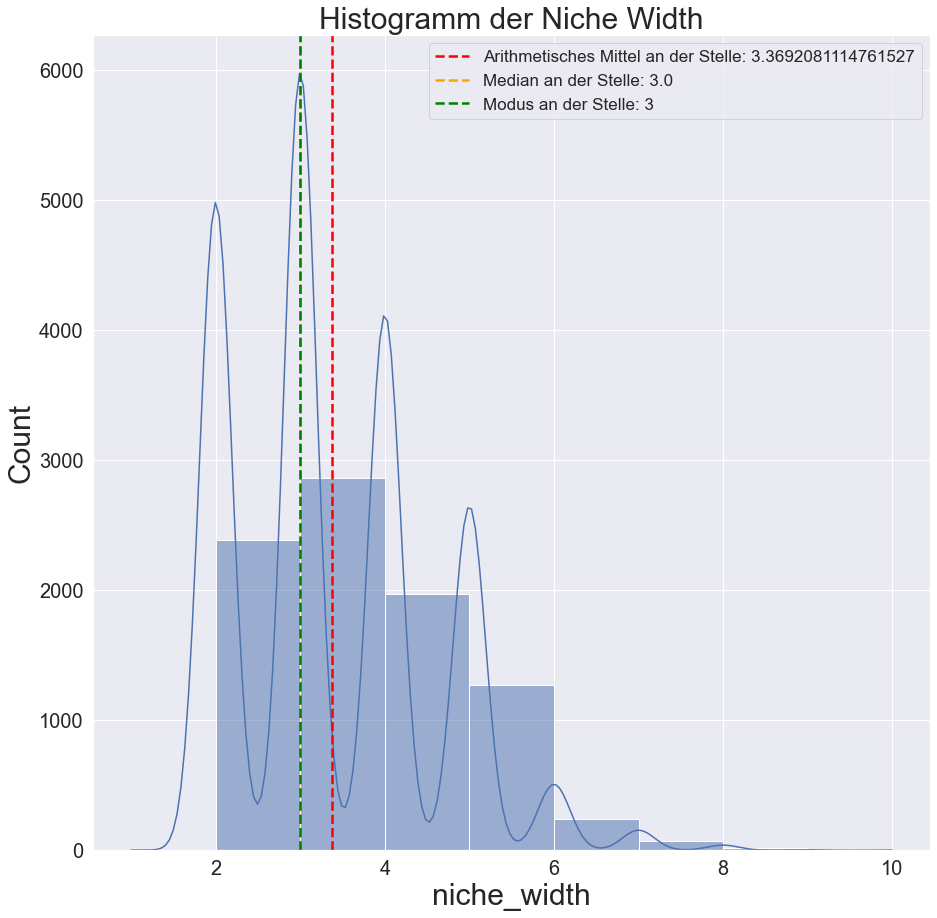

In [141]:
#Erstellt ein Histogram für die niche_width-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.niche_width, binwidth=1, kde=True)              #Erstellt Histogram mit einer Balkenbreite von 1 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("niche_width", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["niche_width"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["niche_width"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["niche_width"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["niche_width"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=3,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 3")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper right', prop={'size': 17})
plt.title("Histogramm der Niche Width", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_niche_width.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [142]:
#Fehlende Werte werden 0 gesetzt um rechnung zu ermöglichen
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(np.nan,0)

In [143]:
#Gibt den Interquartils-Abstand der user_score-Spalte wieder
stats.iqr(metacrit_data["niche_width"])

2.0

In [144]:
#0 wird wieder als fehlender Wert gesetzt
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(0,np.nan)

In [145]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=2
Q3=4
Q1=2
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Oberer Grenzwert für Extremwerte: "+str(Q3+(IQA*3)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 7.0
Untere Whisker Grenze: -1.0
Oberer Grenzwert für Extremwerte: 10
Unterer Grenzwert für Extremwerte: -4


In [146]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print("Zeigt die Anzahl an oberen Ausreißern an: " +str(metacrit_data[(metacrit_data["niche_width"]>7)].shape))
print("Zeigt die Anzahl an oberen Extremwerten an " +str(metacrit_data[(metacrit_data["niche_width"]>10)].shape))

Zeigt die Anzahl an oberen Ausreißern an: (22, 21)
Zeigt die Anzahl an oberen Extremwerten an (0, 21)


##### 3.2.5. Platform Width

In [147]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [148]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["platform_width"].value_counts()

1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
9       1
Name: platform_width, dtype: int64

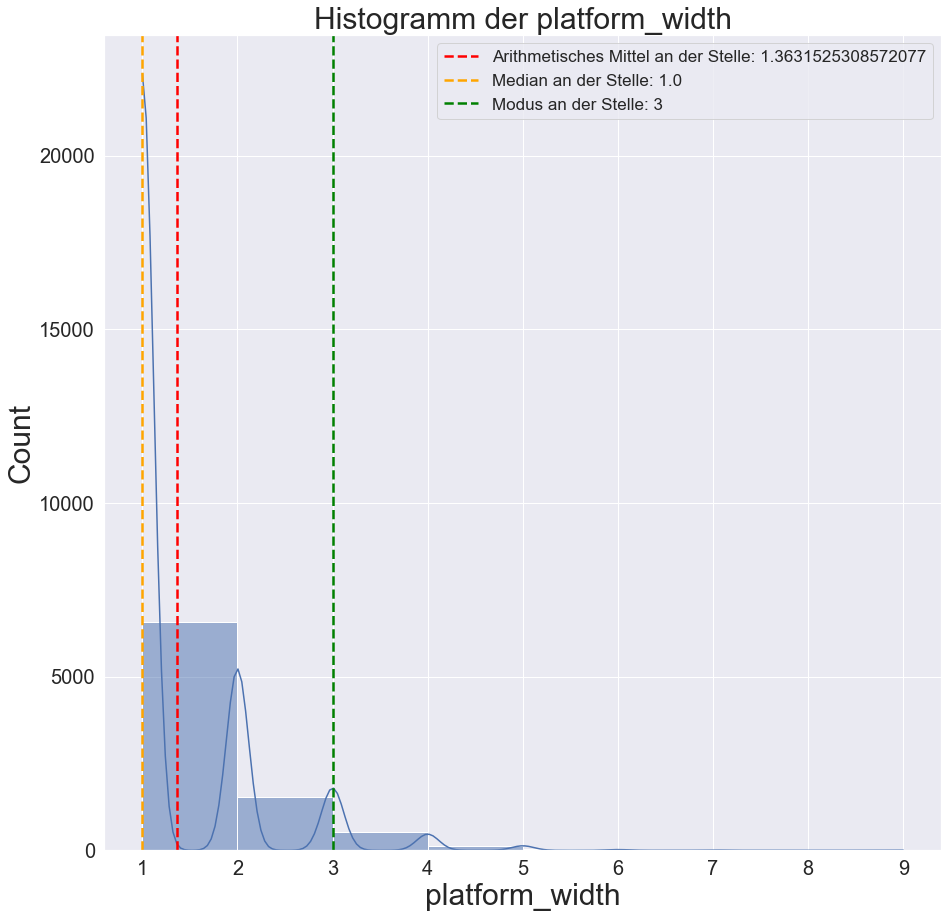

In [149]:
#Erstellt ein Histogram für die platform_width-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.platform_width, binwidth=1, kde=True)              #Erstellt Histogram mit einer Balkenbreite von 1 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("platform_width", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["platform_width"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["platform_width"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["platform_width"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["platform_width"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=3,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 3")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper right', prop={'size': 17})
plt.title("Histogramm der platform_width", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_platform_width.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [150]:
#Gibt den Interquartils-Abstand der user_score-Spalte wieder
stats.iqr(metacrit_data["platform_width"])

1.0

In [151]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=1
Q3=2
Q1=1
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Oberer Grenzwert für Extremwerte: "+str(Q3+(IQA*3)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 3.5
Untere Whisker Grenze: -0.5
Oberer Grenzwert für Extremwerte: 5
Unterer Grenzwert für Extremwerte: -2


In [152]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print("Zeigt die Anzahl an oberen Ausreißern an: " +str(metacrit_data[(metacrit_data["platform_width"]>3.5)].shape))
print("Zeigt die Anzahl an oberen Extremwerten an " +str(metacrit_data[(metacrit_data["platform_width"]>5)].shape))

Zeigt die Anzahl an oberen Ausreißern an: (184, 21)
Zeigt die Anzahl an oberen Extremwerten an (9, 21)


##### 3.2.6. Erscheinungsjahr

In [153]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [154]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["year"].value_counts()

2018.0    498
2017.0    473
2016.0    458
2009.0    454
2008.0    438
2007.0    420
2015.0    419
2006.0    406
2011.0    401
2010.0    381
2002.0    381
2005.0    375
2012.0    374
2003.0    371
2014.0    365
2013.0    355
2004.0    345
2001.0    283
2000.0    200
1998.0     33
1999.0     33
1997.0     20
1996.0     16
1995.0      1
Name: year, dtype: int64

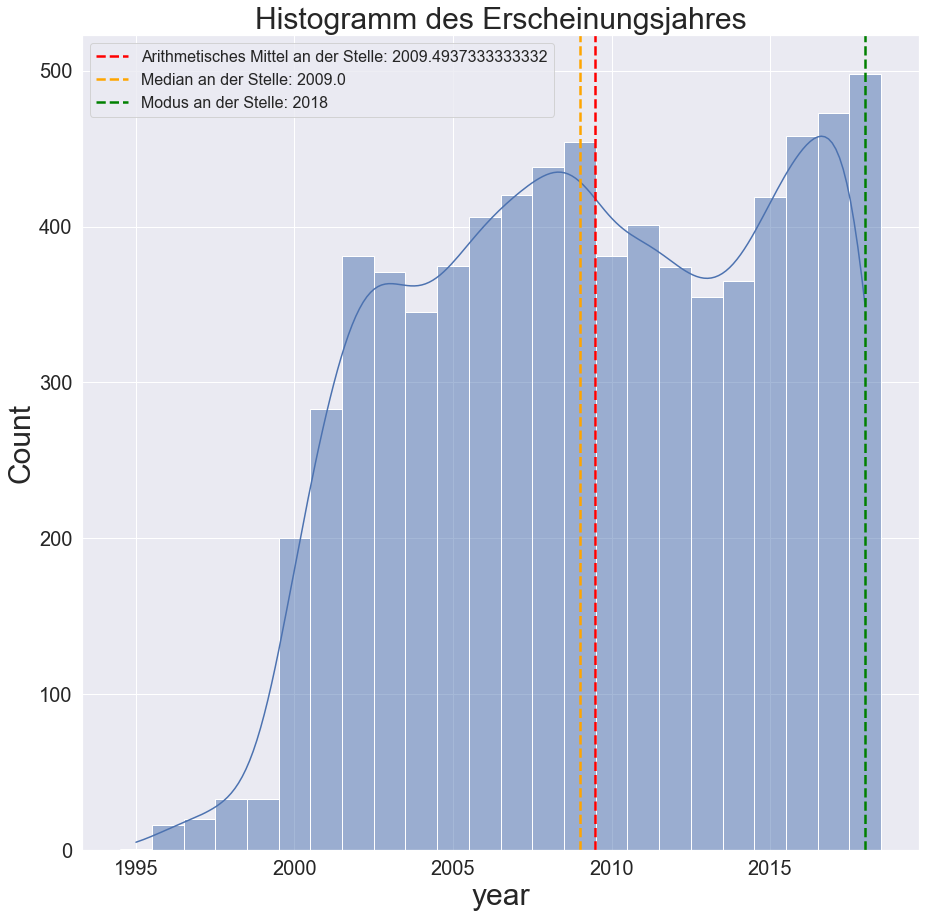

In [155]:
#Erstellt ein Histogram für die year-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.year, discrete=True, kde=True)              #Erstellt Histogram mit einer Balkenbreite von 1 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("year", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["year"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["year"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["year"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["year"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=2018,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 2018")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper left', prop={'size': 16})
plt.title("Histogramm des Erscheinungsjahres", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_year.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [156]:
#Fehlende Werte werden 0 gesetzt um rechnung zu ermöglichen
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [157]:
#Gibt den Interquartils-Abstand der year-Spalte wieder
print(2014-2005)

9


In [158]:
#0 wird wieder als fehlender Wert gesetzt
metacrit_data["year"]=metacrit_data["year"].replace(0,np.nan)

In [159]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=9
Q3=2014
Q1=2005
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Oberer Grenzwert für Extremwerte: "+str(Q3+(IQA*3)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 2027.5
Untere Whisker Grenze: 1991.5
Oberer Grenzwert für Extremwerte: 2041
Unterer Grenzwert für Extremwerte: 1978


##### 3.2.7. Names, Genre, Platform, Developer, Publisher, Release date

In [160]:
metacrit_data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'developer',
       'genre', 'publisher', 'release_date', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10',
       'niche_width', 'platform_width', 'year'],
      dtype='object')

Names:

In [161]:
#Gibt einen Einblick in die Werte, welche in der game_name-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["game_name"]

0       The Legend of Zelda: Ocarina of Time
1                         Super Mario Galaxy
2                       Super Mario Galaxy 2
3                              Metroid Prime
4                        Super Mario Odyssey
                        ...                 
8826                             kill.switch
8827                                  nail'd
8828                          oOo: Ascension
8829                            uDraw Studio
8830                                     xXx
Name: game_name, Length: 8831, dtype: object

Genres:

In [162]:
#Definiert eine Funktion, welche die Anzahl an Spielen abhängig ihrer Anzahl an Genres wiedergibt
def count_gen_only(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)]["game_name"].count()

In [163]:
#Setze die fehlenden Werte in den genre Spalten als 0 fest um Rechnungen zu ermöglichen
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(np.nan, 0)
    x=x+1

In [164]:
#Zeigt auf wie viele Spiele NUR ein bzw. NUR zwei bzw. NUR drei usw. Genres haben
x=1
while x<10:
    print("Spiele mit "+str(x)+". Genre: "+str(count_gen_only(x)))
    x=x+1
print("Spiele mit 10. Genre: "+str(metacrit_data[(metacrit_data[("genre10")] != 0)]["game_name"].count()))

Spiele mit 1. Genre: 1
Spiele mit 2. Genre: 2385
Spiele mit 3. Genre: 2862
Spiele mit 4. Genre: 1973
Spiele mit 5. Genre: 1267
Spiele mit 6. Genre: 243
Spiele mit 7. Genre: 74
Spiele mit 8. Genre: 19
Spiele mit 9. Genre: 2
Spiele mit 10. Genre: 1


In [165]:
#Setze die 0 in den genre Spalten wieder als fehlenden Wert fest 
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(0, np.nan)
    x=x+1

Platform:

In [166]:
#Gibt einen Einblick in die Werte, welche in der platform-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["platform"]

0                 ['nintendo-64']
1                         ['wii']
2                         ['wii']
3                    ['gamecube']
4                      ['switch']
                  ...            
8826    ['xbox', 'playstation-2']
8827                       ['pc']
8828                 ['xbox-one']
8829                      ['wii']
8830         ['game-boy-advance']
Name: platform, Length: 8831, dtype: object

Release Date:

In [167]:
#Gibt einen Einblick in die Werte, welche in der release_date-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["release_date"]

0       Nov 23, 1998
1       Nov 12, 2007
2       May 23, 2010
3       Nov 17, 2002
4       Oct 27, 2017
            ...     
8826    Oct 28, 2003
8827    Nov 30, 2010
8828    May 25, 2018
8829    Nov 14, 2010
8830    Jul 31, 2002
Name: release_date, Length: 8831, dtype: object

Developer: 

In [168]:
#Gibt einen Einblick in die Werte, welche in der developer-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["developer"]

0                  Nintendo
1                  Nintendo
2       Nintendo EAD Tokyo 
3             Retro Studios
4                  Nintendo
               ...         
8826                  Namco
8827               Techland
8828          Kenny Creanor
8829                    THQ
8830        Digital Eclipse
Name: developer, Length: 8831, dtype: object

Publisher:

In [169]:
#Gibt einen Einblick in die Werte, welche in der publisher-Spalte vorhanden sind. (Für mehr infos gesamten Datensatz anzeigen lassen)
metacrit_data["publisher"]

0                 Nintendo
1                 Nintendo
2                 Nintendo
3                 Nintendo
4                 Nintendo
               ...        
8826                 Namco
8827           Deep Silver
8828    Extra Mile Studios
8829                   THQ
8830            Activision
Name: publisher, Length: 8831, dtype: object

# PASST!!!

# 4. Hypothesenprüfung: 

Stata Code:

Nachfolgend werden einige Untersuchungen mithilfe der Statistikanalysesoftware Stata durchgeführt. 
Ob Stata genutzt wird ist an einem "%stata" direkt vor dem Code oder einem "%%stata" am anfang der Code Zelle zu erkennen. Ein einfaches %-Zeichen sagt aus, dass der direkt dort hinterstehende Code von Stata ausgeführt wird. Ein doppeltes %-Zeichen sagt aus, dass der gesamte Code in der jeweiligen Code Zelle von Stata ausgeführt wird, auch wenn vor den einzelnen Code Absätzen kein "%Stata" steht. 

In [170]:
#Erstellt eine Kopie des metacrit_data-Dataframes, welcher an die nachfolgende Untersuchung angepasst werden kann, ohne den Hauptdatensatz zu verändern.
metacrit_data_hypo = metacrit_data.copy()

In [171]:
#Erstellt einen für Stata lesbare Datei mit den eingegebnen Spalten
metacrit_data_hypo[["game_name","meta_score","user_score","niche_width","platform_width","year", "publisher"]].to_stata('Stata/Stata_Data/stata_data_hypo.dta')

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output1.smcl
  log type:  smcl
 opened on:  22 Jan 2023, 02:43:31


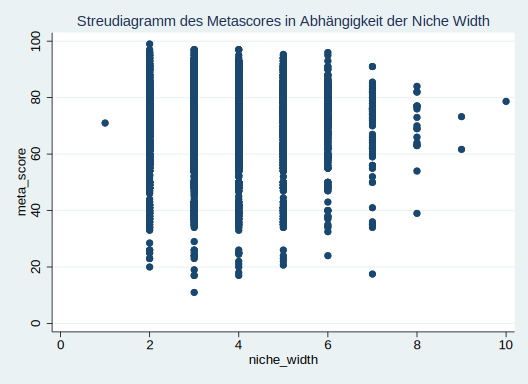

file Pictures/Stata/scatter_meta_niche.png written in PNG format


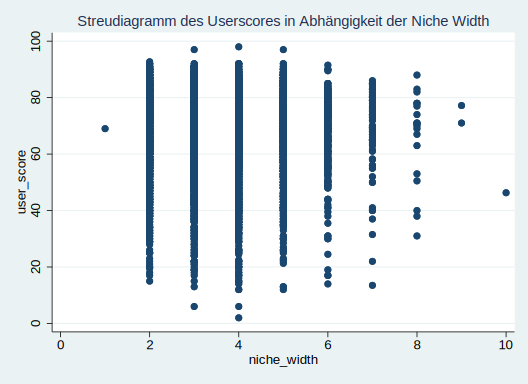

file Pictures/Stata/scatter_user_niche.png written in PNG format

             | meta_s~e user_s~e niche_~h platfo~h     year
-------------+---------------------------------------------
  meta_score |   1.0000 
             |
             |
  user_score |   0.5834*  1.0000 
             |   0.0000
             |
 niche_width |   0.0006  -0.0491*  1.0000 
             |   0.9587   0.0000
             |
platform_w~h |   0.1112*  0.0008   0.0147   1.0000 
             |   0.0000   0.9417   0.1670
             |
        year |   0.0074  -0.2158* -0.0461*  0.0489*  1.0000 
             |   0.5193   0.0000   0.0001   0.0000
             |

Skewness and kurtosis tests for normality
                                                         ----- Joint test -----
    Variable |       Obs   Pr(skewness)   Pr(kurtosis)   Adj chi2(2)  Prob>chi2
-------------+-----------------------------------------------------------------
  meta_score |     8,831         0.0000         0.0000        786.88     0.0

In [172]:
#METASCORE und USERSCORE:

#Erstellt eine Log-Datei, welche den Stata Output abspeichert
%stata log using Stata/Stata_Output/Stata_Output1, replace

#Liest den erstellten Datensatz in Stata ein
%stata use Stata/Stata_Data/stata_data_hypo

#Erstellt ein Streudiagramm mit dem Metascore als abhängige Variable und der Niche Width als unabhängige Variable 
%stata scatter meta_score niche_width, title(Streudiagramm des Metascores in Abhängigkeit der Niche Width, size(medium))
#Speichert die Grafik als jpg-Datei
%stata graph export Pictures/Stata/scatter_meta_niche.png, width(3840) replace

#Erstellt ein Streudiagramm mit dem Uetascore als abhängige Variable und der Niche Width als unabhängige Variable 
%stata scatter user_score niche_width, title(Streudiagramm des Userscores in Abhängigkeit der Niche Width, size(medium))
#Speichert die Grafik als jpg-Datei
%stata graph export Pictures/Stata/scatter_user_niche.png, width(3840) replace

#Erstellt eine Korrelations-Matrix 
%stata pwcorr meta_score user_score niche_width platform_width year, sig star(0.05)

#Überprüft ob die Schiefe der Variablen in einem aktzeptablen Bereich liegen, sodass die Annahme der Normalverteilung nicht verletzt wäre
%stata sktest meta_score
%stata sktest user_score

#Beendet das Log
%stata log close
#Schreibt den Stata Output in eine PDF-Datei um eine einfache Betrachtung zu ermöglichen
%stata translate Stata/Stata_Output/Stata_Output1.smcl Stata/Stata_Output/Stata_Output1.pdf
%stata clear

In [173]:
#METASCORE und USERSCORE:

#Erstellt eine Log-Datei, welche den Stata Output abspeichert
%stata log using Stata/Stata_Output/Stata_Output_restest, replace

#Liest den erstellten Datensatz in Stata ein
%stata use Stata/Stata_Data/stata_data_hypo

%stata regress meta_score niche_width platform_width year
%stata predict res_meta, resid
%stata sktest res_meta

%stata regress user_score niche_width platform_width year
%stata predict res_user, resid
%stata sktest res_user

#Beendet das Log
%stata log close
#Schreibt den Stata Output in eine PDF-Datei um eine einfache Betrachtung zu ermöglichen
%stata translate Stata/Stata_Output/Stata_Output_restest.smcl Stata/Stata_Output/_restest.pdf
%stata clear

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output_restest.smcl
  log type:  smcl
 opened on:  22 Jan 2023, 02:43:40

      Source |       SS           df       MS      Number of obs   =     7,500
-------------+----------------------------------   F(3, 7496)      =     31.56
       Model |  14610.4254         3  4870.14181   Prob > F        =    0.0000
    Residual |   1156843.4     7,496  154.328095   R-squared       =    0.0125
-------------+----------------------------------   Adj R-squared   =    0.0121
       Total |  1171453.83     7,499  156.214672   Root MSE        =    12.423

------------------------------------------------------------------------------
  meta_score | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 niche_width |    .1736

### 4.1. Mittelwerte pro möglicher Genre-Anzahl

In [174]:
# Setze die Missing Values in den genre Spalten als 0 fest um Rechnungen zu ermöglichen
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(np.nan, 0)
    x=x+1

In [175]:
#Diese Funktionen geben das aritmethische Mittel oder den Median des Metascores bzw. Userscores in Abhänigkeit der Genre-Anzahl wieder.

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl:
def mean_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].median()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def mean_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].median()


In [176]:
#Gibt das aritmethische Mittel des Meta Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("Spiele mit "+ str(x),"Genre: ",mean_gen_only_meta(x))
    x=x+1
print("Spiele mit 10 Genre: " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["meta_score"].mean()) )



Spiele mit 1 Genre:  71.0
Spiele mit 2 Genre:  70.74314465408808
Spiele mit 3 Genre:  70.85366177498254
Spiele mit 4 Genre:  71.0050836289914
Spiele mit 5 Genre:  71.35331491712708
Spiele mit 6 Genre:  69.89884773662551
Spiele mit 7 Genre:  67.80864864864866
Spiele mit 8 Genre:  69.75421052631579
Spiele mit 9 Genre:  67.46000000000001
Spiele mit 10 Genre: 78.67


In [177]:
#Gibt den Median des Meta Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("genre"+ str(x), ": ",median_gen_only_meta(x))
    x=x+1
print("genre10 : " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["meta_score"].median()) )

genre1 :  71.0
genre2 :  73.0
genre3 :  73.0
genre4 :  74.0
genre5 :  74.0
genre6 :  73.0
genre7 :  72.75
genre8 :  70.0
genre9 :  67.46000000000001
genre10 : 78.67


In [178]:
#Gibt das aritmethische Mittel des User Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("genre"+ str(x), ": ",mean_gen_only_user(x))
    x=x+1
print("genre10 : " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["user_score"].mean()) )

genre1 :  69.0
genre2 :  70.49983228511532
genre3 :  70.3929769392033
genre4 :  69.07536746071973
genre5 :  69.63922651933702
genre6 :  67.62304526748973
genre7 :  67.0945945945946
genre8 :  66.01052631578948
genre9 :  74.1
genre10 : 46.3


In [179]:
#Gibt den Median des User Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("genre"+ str(x), ": ",median_gen_only_user(x))
    x=x+1
print("genre10 : " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["user_score"].median()) )

genre1 :  69.0
genre2 :  73.0
genre3 :  73.0
genre4 :  72.5
genre5 :  72.0
genre6 :  72.0
genre7 :  69.5
genre8 :  70.7
genre9 :  74.1
genre10 : 46.3


In [180]:
#Setze die 0 in den genre Spalten wieder als fehlenden Wert
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(0, np.nan)
    x=x+1

### 4.2. Hypothese 2


In [181]:
#Erstellt von jeder genre Spalte eine Liste mit den einzigartigen Genres der jeweiligen Spalte
genre1_list=metacrit_data["genre1"].unique().tolist()
genre2_list=metacrit_data["genre2"].unique().tolist()
genre3_list=metacrit_data["genre3"].unique().tolist()
genre4_list=metacrit_data["genre4"].unique().tolist()
genre5_list=metacrit_data["genre5"].unique().tolist()
genre6_list=metacrit_data["genre6"].unique().tolist()
genre7_list=metacrit_data["genre7"].unique().tolist()
genre8_list=metacrit_data["genre8"].unique().tolist()
genre9_list=metacrit_data["genre9"].unique().tolist()
genre10_list=metacrit_data["genre10"].unique().tolist()

In [182]:
#Erstellt aus den einzelnen Listen eine einzige Liste, bei der jedes einzigartige Genre nur einmal aufgelistet wird.
list_of_unique_genres=sorted(np.unique(genre1_list+genre2_list+genre3_list+genre4_list+genre5_list+genre6_list+genre7_list+genre8_list+genre9_list+genre10_list))
list_of_unique_genres.remove("nan")
list_of_unique_genres

['"Beat-Em-Up"',
 '"Shoot-Em-Up"',
 '2D',
 '3D',
 '4X',
 'Action',
 'ActionAdventure',
 'ActionRPG',
 'Adventure',
 'Alternative',
 'Application',
 'Arcade',
 'Artillery',
 'Athletics',
 'Automobile',
 'Baseball',
 'Basketball',
 'Biking',
 'Billiards',
 'Board/CardGame',
 'BoardGames',
 'Bowling',
 'Boxing',
 'Boxing/MartialArts',
 'Breeding/Constructing',
 'Business/Tycoon',
 'CarCombat',
 'CardBattle',
 'Career',
 'CityBuilding',
 'Civilian',
 'CivilianPlane',
 'Combat',
 'Command',
 'Compilation',
 'Console-styleRPG',
 'Cricket',
 'Dancing',
 'Defense',
 'DemolitionDerby',
 'Drag',
 'Driving',
 'Edutainment',
 'Exercise/Fitness',
 'Fantasy',
 'Fighting',
 'First-Person',
 'Fishing',
 'Flight',
 'Football',
 'FormulaOne',
 'Futuristic',
 'FuturisticJet',
 'FuturisticSub',
 'GT/Street',
 'Gambling',
 'General',
 'Golf',
 'Government',
 'Helicopter',
 'HiddenObject',
 'Historic',
 'Horizontal',
 'Horror',
 'HorseRacing',
 'Hunting',
 'IceHockey',
 'Individual',
 'InteractiveMovie',
 '

In [183]:
#Gibt die Länge der Genre Liste wieder
len(list_of_unique_genres)

168

In [184]:
#Gibt die Position des eigegebenen Genres ("Tank") wieder
list_of_unique_genres.index("Tank")

142

In [185]:
#Gibt das Genre an der eingegebenen Position (142) wieder
list_of_unique_genres[142]

'Tank'

In [203]:
#Erstellt 2 leere DataFrames, welche mit Werten "befüllt" werden können
data = {'genre': [],
        "count": [],
        'score_mean': [],
        'standard_deviation': [],
        'score_median': [],
        "nw_mean": [],
        "pw_mean": [],
        "y_mean": [],}

genre_meta_df = pd.DataFrame(data)
genre_user_df = pd.DataFrame(data)

In [204]:
metacrit_data["meta_score"].count()

8831

In [188]:
#"nw_mean","pw_mean","y_mean"

In [205]:
#Überträgt das Arithmetische Mittel und den Median des MetaScores je Genre (über 30 Fälle) in einen gesonderten DataFrame
x=1
while x<168:
    temp_df=metacrit_data[(metacrit_data["genre1"]==list_of_unique_genres[x]) | (metacrit_data["genre2"]==list_of_unique_genres[x]) | (metacrit_data["genre3"]==list_of_unique_genres[x]) | (metacrit_data["genre4"]==list_of_unique_genres[x]) | (metacrit_data["genre5"]==list_of_unique_genres[x]) | (metacrit_data["genre6"]==list_of_unique_genres[x]) | (metacrit_data["genre7"]==list_of_unique_genres[x]) | (metacrit_data["genre8"]==list_of_unique_genres[x]) | (metacrit_data["genre9"]==list_of_unique_genres[x]) | (metacrit_data["genre10"]==list_of_unique_genres[1])] #Erstellt einen temporären DataFrame, welcher jeden Fall abspeichert, der ein bestimmtes Genre in einer der Genrespalten enthält. (Kurzzeitig entsteht somit ein Dataframe mit allen Spielen, die das Genre Action enthalten)
    if len(temp_df)>30:
        genre_meta_df.loc[x,["genre","count", "score_mean","standard_deviation", "score_median", "nw_mean", "pw_mean", "y_mean"]] = [list_of_unique_genres[x], (temp_df["meta_score"].count()), (temp_df["meta_score"].mean()), (temp_df["meta_score"].std()), (temp_df["meta_score"].median()),(temp_df["niche_width"].mean()),(temp_df["platform_width"].mean()), (temp_df["year"].mean()) ]
        #print("Median für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["meta_score"].median()) )
        #print("Arithmetisches Mittel für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["meta_score"].mean()) )
    x=x+1
genre_meta_df

,genre,count,score_mean,standard_deviation,score_median,nw_mean,pw_mean,y_mean
1,"""Shoot-Em-Up""",208.0,71.139856,10.508345,73.625,4.975962,1.264423,2012.276836
2,2D,721.0,72.366449,11.457728,75.000,3.374480,1.342580,2011.264803
3,3D,724.0,69.177707,12.115529,70.000,3.654696,1.378453,2009.652459
4,4X,42.0,78.684524,11.146893,80.000,3.761905,1.142857,2009.969697
5,Action,3125.0,69.995555,12.599483,72.000,3.771200,1.374720,2010.042398
...,...,...,...,...,...,...,...,...
158,Virtual,113.0,70.516195,9.701444,72.000,4.115044,1.238938,2010.510204
159,VirtualLife,83.0,71.060241,9.942283,73.000,3.915663,1.204819,2009.027027
160,VisualNovel,68.0,75.071029,9.756602,77.750,2.558824,1.250000,2014.657143
166,Western-Style,118.0,75.196271,11.834628,77.000,2.889831,1.313559,2010.076923


In [209]:
genre_user_df.sort_values("standard_deviation")

,genre,count,score_mean,standard_deviation,score_median,nw_mean,pw_mean,y_mean
62,Horizontal,49.0,72.397959,7.976358,74.00,5.040816,1.306122,2012.564103
80,Matching,55.0,72.903636,8.337198,73.00,3.254545,1.254545,2007.711538
132,Static,31.0,74.677419,8.780232,77.00,5.225806,1.161290,2009.000000
107,Rally/Offroad,50.0,71.460000,9.747695,72.75,4.260000,1.520000,2006.060000
156,Vertical,78.0,69.817949,9.956760,71.50,5.230769,1.217949,2011.575342
...,...,...,...,...,...,...,...,...
49,Football,77.0,66.702597,16.498596,71.00,4.506494,1.896104,2006.297297
143,Team,223.0,62.000897,16.982163,68.00,4.704036,1.663677,2010.821429
128,Soccer,101.0,65.086139,17.062057,71.00,4.514851,1.900990,2009.032967
140,Tactical,156.0,64.748077,17.258234,68.00,5.153846,1.538462,2009.389706


In [208]:
#Überträgt das Arithmetische Mittel und den Median des UserScores je Genre (über 30 Fälle) in einen gesonderten DataFrame
x=1
while x<168:
    temp_df=metacrit_data[(metacrit_data["genre1"]==list_of_unique_genres[x]) | (metacrit_data["genre2"]==list_of_unique_genres[x]) | (metacrit_data["genre3"]==list_of_unique_genres[x]) | (metacrit_data["genre4"]==list_of_unique_genres[x]) | (metacrit_data["genre5"]==list_of_unique_genres[x]) | (metacrit_data["genre6"]==list_of_unique_genres[x]) | (metacrit_data["genre7"]==list_of_unique_genres[x]) | (metacrit_data["genre8"]==list_of_unique_genres[x]) | (metacrit_data["genre9"]==list_of_unique_genres[x]) | (metacrit_data["genre10"]==list_of_unique_genres[1])]
    if len(temp_df)>30:
        genre_user_df.loc[x,["genre", "count", "score_mean", "standard_deviation", "score_median","nw_mean", "pw_mean", "y_mean"]] = [list_of_unique_genres[x],(temp_df["meta_score"].count()), (temp_df["user_score"].mean()), (temp_df["user_score"].std()), (temp_df["user_score"].median()),(temp_df["niche_width"].mean()),(temp_df["platform_width"].mean()), (temp_df["year"].mean()) ]
        #print("Median für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["user_score"].median()) )
        #print("Arithmetisches Mittel für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["user_score"].mean()) )
    x=x+1
genre_user_df

,genre,count,score_mean,standard_deviation,score_median,nw_mean,pw_mean,y_mean
1,"""Shoot-Em-Up""",208.0,69.948077,10.025783,72.0,4.975962,1.264423,2012.276836
2,2D,721.0,71.209015,11.600374,73.0,3.374480,1.342580,2011.264803
3,3D,724.0,70.176657,12.451702,72.0,3.654696,1.378453,2009.652459
4,4X,42.0,73.138095,13.611813,77.0,3.761905,1.142857,2009.969697
5,Action,3125.0,69.572160,13.017109,72.0,3.771200,1.374720,2010.042398
...,...,...,...,...,...,...,...,...
158,Virtual,113.0,66.085841,13.137167,70.0,4.115044,1.238938,2010.510204
159,VirtualLife,83.0,66.102410,13.533004,71.0,3.915663,1.204819,2009.027027
160,VisualNovel,68.0,72.194118,12.913477,75.0,2.558824,1.250000,2014.657143
166,Western-Style,118.0,71.853390,13.053340,75.0,2.889831,1.313559,2010.076923


In [207]:
genre_meta_df.sort_values("score_mean")

,genre,count,score_mean,standard_deviation,score_median,nw_mean,pw_mean,y_mean
98,Party,50.0,58.270000,16.388526,59.000,3.080000,1.080000,2007.780000
99,Party/Minigame,80.0,62.956250,15.123792,63.000,3.175000,1.100000,2011.507692
95,Other,50.0,64.588400,12.822850,64.335,4.660000,1.380000,2008.808511
84,Mission-based,35.0,64.742857,11.137039,64.000,3.342857,1.685714,2005.000000
154,Tycoon,44.0,65.011364,12.608823,64.500,3.977273,1.068182,2005.909091
...,...,...,...,...,...,...,...,...
128,Soccer,101.0,75.684554,11.959374,78.500,4.514851,1.900990,2009.032967
49,Football,77.0,76.307403,10.248677,78.000,4.506494,1.896104,2006.297297
118,Sim,289.0,76.469412,10.164461,79.000,4.484429,1.871972,2006.904059
66,IceHockey,45.0,76.474000,9.493991,79.000,4.511111,1.444444,2007.317073


In [192]:
genre_meta_df.sort_values("score_median")

,genre,count,score_mean,score_median,nw_mean,pw_mean,y_mean
98,Party,50.0,58.270000,59.000,3.080000,1.080000,2007.780000
99,Party/Minigame,80.0,62.956250,63.000,3.175000,1.100000,2011.507692
84,Mission-based,35.0,64.742857,64.000,3.342857,1.685714,2005.000000
95,Other,50.0,64.588400,64.335,4.660000,1.380000,2008.808511
154,Tycoon,44.0,65.011364,64.500,3.977273,1.068182,2005.909091
...,...,...,...,...,...,...,...
15,Baseball,66.0,75.666515,78.000,4.409091,1.439394,2007.419355
128,Soccer,101.0,75.684554,78.500,4.514851,1.900990,2009.032967
66,IceHockey,45.0,76.474000,79.000,4.511111,1.444444,2007.317073
118,Sim,289.0,76.469412,79.000,4.484429,1.871972,2006.904059


In [210]:
genre_user_df.sort_values("score_mean")

,genre,count,score_mean,standard_deviation,score_median,nw_mean,pw_mean,y_mean
143,Team,223.0,62.000897,16.982163,68.00,4.704036,1.663677,2010.821429
98,Party,50.0,63.240000,16.058643,67.50,3.080000,1.080000,2007.780000
99,Party/Minigame,80.0,63.856250,14.105209,66.50,3.175000,1.100000,2011.507692
155,Vehicle,54.0,64.394444,13.245781,67.75,4.462963,1.148148,2010.976744
67,Individual,185.0,64.419459,14.392603,67.00,4.556757,1.464865,2010.165644
...,...,...,...,...,...,...,...,...
69,Japanese-Style,183.0,73.446448,10.597210,75.00,2.819672,1.240437,2012.555556
33,Command,45.0,74.022222,14.389846,75.00,4.288889,1.022222,2006.775000
132,Static,31.0,74.677419,8.780232,77.00,5.225806,1.161290,2009.000000
34,Compilation,208.0,74.679808,10.625940,77.00,3.067308,1.432692,2010.477987


In [211]:
genre_user_df.sort_values("score_median")

,genre,count,score_mean,standard_deviation,score_median,nw_mean,pw_mean,y_mean
66,IceHockey,45.0,65.182222,14.821549,66.50,4.511111,1.444444,2007.317073
99,Party/Minigame,80.0,63.856250,14.105209,66.50,3.175000,1.100000,2011.507692
67,Individual,185.0,64.419459,14.392603,67.00,4.556757,1.464865,2010.165644
98,Party,50.0,63.240000,16.058643,67.50,3.080000,1.080000,2007.780000
155,Vehicle,54.0,64.394444,13.245781,67.75,4.462963,1.148148,2010.976744
...,...,...,...,...,...,...,...,...
34,Compilation,208.0,74.679808,10.625940,77.00,3.067308,1.432692,2010.477987
4,4X,42.0,73.138095,13.611813,77.00,3.761905,1.142857,2009.969697
132,Static,31.0,74.677419,8.780232,77.00,5.225806,1.161290,2009.000000
63,Horror,140.0,73.255000,13.269104,77.50,3.064286,1.464286,2007.927007


In [196]:
genre_user_df.sort_values("count")

,genre,count,score_mean,score_median,nw_mean,pw_mean,y_mean
132,Static,31.0,74.677419,77.00,5.225806,1.161290,2009.000000
30,Civilian,34.0,65.647059,69.35,4.323529,1.205882,2007.629630
84,Mission-based,35.0,66.757143,69.00,3.342857,1.685714,2005.000000
28,Career,36.0,65.477778,69.75,4.333333,1.361111,2013.466667
129,Space,38.0,67.715789,69.85,4.736842,1.105263,2007.742857
...,...,...,...,...,...,...,...
111,Role-Playing,1059.0,72.777904,76.00,2.676110,1.278565,2010.218310
117,Shooter,1101.0,68.393824,71.50,4.784741,1.417802,2009.374486
6,ActionAdventure,1208.0,70.636258,73.00,3.004967,1.587748,2010.654886
56,General,2488.0,68.706592,71.00,3.305466,1.293810,2010.783230


In [197]:
genre_user_df["count"].mean()

312.8131868131868

Stata Code:

Nachfolgend werden einige Untersuchungen mithilfe der Statistikanalysesoftware Stata durchgeführt. 
Ob Stata genutzt wird ist an einem "%stata" direkt vor dem Code oder einem "%%stata" am anfang der Code Zelle zu erkennen. Ein einfaches %-Zeichen sagt aus, dass der direkt dort hinterstehende Code von Stata ausgeführt wird. Ein doppeltes %-Zeichen sagt aus, dass der gesamte Code in der jeweiligen Code Zelle von Stata ausgeführt wird, auch wenn vor den einzelnen Code Absätzen kein "%Stata" steht. 

In [199]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Erstellt eine Kopie des metacrit_data-Dataframes, welcher an die nachfolgende Untersuchung angepasst werden kann, ohne den Hauptdatensatz zu verändern.
genre_meta_df_hypo = genre_meta_df.copy()
genre_user_df_hypo = genre_user_df.copy()


In [200]:
genre_meta_df_hypo.to_stata('Stata/Stata_Data/stata_data_genre_meta_hypo.dta')
genre_user_df_hypo.to_stata('Stata/Stata_Data/stata_data_genre_user_hypo.dta')

In [202]:
metacrit_data["meta_score"].std()

12.181943658506851

Exception in thread Stata:
Traceback (most recent call last):
  File "c:\Users\Marek\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Program Files/Stata17/utilities\pystata\core\stout.py", line 169, in run
    raise SystemError(output)
SystemError: no; dataset in memory has changed since last saved
r(4);



-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output_genremetahypo.smcl
  log type:  smcl
 opened on:  22 Jan 2023, 02:45:13


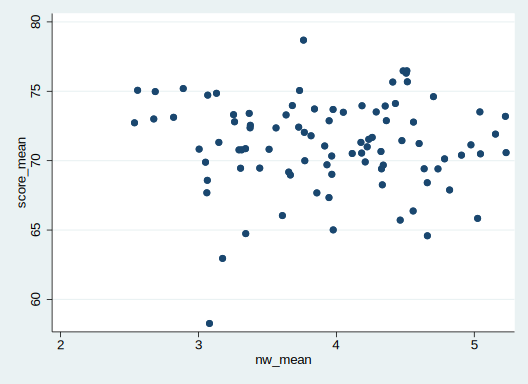

file Pictures/Stata/scatter_genremeta_niche.png written in PNG format

             | scor~ean  nw_mean  pw_mean   y_mean
-------------+------------------------------------
  score_mean |   1.0000 
             |
             |
     nw_mean |  -0.0245   1.0000 
             |   0.8175
             |
     pw_mean |   0.2065*  0.1722   1.0000 
             |   0.0495   0.1026
             |
      y_mean |   0.0790  -0.1860  -0.1324   1.0000 
             |   0.4568   0.0775   0.2108
             |
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output_genremetahypo.smcl
  log type:  smcl
 closed on:  22 Jan 2023, 02:45:15
-------------------------------------------------------------------------------
file Stata/Stata_Output/Stata_Output_genremetahypo.pdf saved as PDF format


In [201]:
#METASCORE:

#Erstellt eine Log-Datei, welche den Stata Output abspeichert
%stata log using Stata/Stata_Output/Stata_Output_genremetahypo, replace

#Liest den erstellten Datensatz in Stata ein
%stata use Stata/Stata_Data/stata_data_genre_meta_hypo.dta

#Erstellt ein Streudiagramm mit dem Metascore als abhängige Variable und der Niche Width als unabhängige Variable 
%stata scatter score_mean nw_mean 
#title(Streudiagramm des Metascores in Abhängigkeit der Niche Width, size(medium))
#Speichert die Grafik als jpg-Datei
%stata graph export Pictures/Stata/scatter_genremeta_niche.png, width(3840) replace

#Erstellt eine Korrelations-Matrix 
%stata pwcorr score_mean nw_mean pw_mean y_mean, sig star(0.05)

#Beendet das Log
%stata log close
#Schreibt den Stata Output in eine PDF-Datei um eine einfache Betrachtung zu ermöglichen
%stata translate Stata/Stata_Output/Stata_Output_genremetahypo.smcl Stata/Stata_Output/Stata_Output_genremetahypo.pdf
%stata clear

In [ ]:
#METASCORE und USERSCORE:

#Erstellt eine Log-Datei, welche den Stata Output abspeichert
%stata log using Stata/Stata_Output/Stata_Output_restest, replace

#Liest den erstellten Datensatz in Stata ein
%stata use Stata/Stata_Data/stata_data_hypo

%stata regress meta_score niche_width platform_width year
%stata predict res_meta, resid
%stata sktest res_meta

%stata regress user_score niche_width platform_width year
%stata predict res_user, resid
%stata sktest res_user

#Beendet das Log
%stata log close
#Schreibt den Stata Output in eine PDF-Datei um eine einfache Betrachtung zu ermöglichen
%stata translate Stata/Stata_Output/Stata_Output_restest.smcl Stata/Stata_Output/_restest.pdf

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  c:\Users\Marek\Documents\GitHub\BachelorThesis\Stata/Stata_Output/
> Stata_Output_restest.smcl
  log type:  smcl
 opened on:  19 Jan 2023, 01:33:31

      Source |       SS           df       MS      Number of obs   =     7,500
-------------+----------------------------------   F(3, 7496)      =     31.56
       Model |  14610.4254         3  4870.14181   Prob > F        =    0.0000
    Residual |   1156843.4     7,496  154.328095   R-squared       =    0.0125
-------------+----------------------------------   Adj R-squared   =    0.0121
       Total |  1171453.83     7,499  156.214672   Root MSE        =    12.423

------------------------------------------------------------------------------
  meta_score | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 niche_width |    .1736

### 4.1. Mittelwerte pro möglicher Genre-Anzahl

In [ ]:
# Setze die Missing Values in den genre Spalten als 0 fest um Rechnungen zu ermöglichen
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(np.nan, 0)
    x=x+1

In [ ]:
#Diese Funktionen geben das aritmethische Mittel oder den Median des Metascores bzw. Userscores in Abhänigkeit der Genre-Anzahl wieder.

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl:
def mean_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].median()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def mean_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].median()


In [ ]:
#Gibt das aritmethische Mittel des Meta Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("Spiele mit "+ str(x),"Genre: ",mean_gen_only_meta(x))
    x=x+1
print("Spiele mit 10 Genre: " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["meta_score"].mean()) )



Spiele mit 1 Genre:  71.0
Spiele mit 2 Genre:  70.74314465408808
Spiele mit 3 Genre:  70.85366177498254
Spiele mit 4 Genre:  71.0050836289914
Spiele mit 5 Genre:  71.35331491712708
Spiele mit 6 Genre:  69.89884773662551
Spiele mit 7 Genre:  67.80864864864866
Spiele mit 8 Genre:  69.75421052631579
Spiele mit 9 Genre:  67.46000000000001
Spiele mit 10 Genre: 78.67


In [ ]:
#Gibt den Median des Meta Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("genre"+ str(x), ": ",median_gen_only_meta(x))
    x=x+1
print("genre10 : " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["meta_score"].median()) )

genre1 :  71.0
genre2 :  73.0
genre3 :  73.0
genre4 :  74.0
genre5 :  74.0
genre6 :  73.0
genre7 :  72.75
genre8 :  70.0
genre9 :  67.46000000000001
genre10 : 78.67


In [ ]:
#Gibt das aritmethische Mittel des User Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("genre"+ str(x), ": ",mean_gen_only_user(x))
    x=x+1
print("genre10 : " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["user_score"].mean()) )

genre1 :  69.0
genre2 :  70.49983228511532
genre3 :  70.3929769392033
genre4 :  69.07536746071973
genre5 :  69.63922651933702
genre6 :  67.62304526748973
genre7 :  67.0945945945946
genre8 :  66.01052631578948
genre9 :  74.1
genre10 : 46.3


In [ ]:
#Gibt den Median des User Scores für jede Genre-Anzahl an.
x=1
while x<10:
    print("genre"+ str(x), ": ",median_gen_only_user(x))
    x=x+1
print("genre10 : " + str(metacrit_data[(metacrit_data["genre10"]!= 0)]["user_score"].median()) )

genre1 :  69.0
genre2 :  73.0
genre3 :  73.0
genre4 :  72.5
genre5 :  72.0
genre6 :  72.0
genre7 :  69.5
genre8 :  70.7
genre9 :  74.1
genre10 : 46.3


In [ ]:
#Setze die 0 in den genre Spalten wieder als fehlenden Wert
x=1
while x<11:
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(0, np.nan)
    x=x+1

### 4.2. Hypothese 2


In [ ]:
#Erstellt von jeder genre Spalte eine Liste mit den einzigartigen Genres der jeweiligen Spalte
genre1_list=metacrit_data["genre1"].unique().tolist()
genre2_list=metacrit_data["genre2"].unique().tolist()
genre3_list=metacrit_data["genre3"].unique().tolist()
genre4_list=metacrit_data["genre4"].unique().tolist()
genre5_list=metacrit_data["genre5"].unique().tolist()
genre6_list=metacrit_data["genre6"].unique().tolist()
genre7_list=metacrit_data["genre7"].unique().tolist()
genre8_list=metacrit_data["genre8"].unique().tolist()
genre9_list=metacrit_data["genre9"].unique().tolist()
genre10_list=metacrit_data["genre10"].unique().tolist()

In [ ]:
#Erstellt aus den einzelnen Listen eine einzige Liste, bei der jedes einzigartige Genre nur einmal aufgelistet wird.
list_of_unique_genres=sorted(np.unique(genre1_list+genre2_list+genre3_list+genre4_list+genre5_list+genre6_list+genre7_list+genre8_list+genre9_list+genre10_list))
list_of_unique_genres.remove("nan")
list_of_unique_genres

['"Beat-Em-Up"',
 '"Shoot-Em-Up"',
 '2D',
 '3D',
 '4X',
 'Action',
 'ActionAdventure',
 'ActionRPG',
 'Adventure',
 'Alternative',
 'Application',
 'Arcade',
 'Artillery',
 'Athletics',
 'Automobile',
 'Baseball',
 'Basketball',
 'Biking',
 'Billiards',
 'Board/CardGame',
 'BoardGames',
 'Bowling',
 'Boxing',
 'Boxing/MartialArts',
 'Breeding/Constructing',
 'Business/Tycoon',
 'CarCombat',
 'CardBattle',
 'Career',
 'CityBuilding',
 'Civilian',
 'CivilianPlane',
 'Combat',
 'Command',
 'Compilation',
 'Console-styleRPG',
 'Cricket',
 'Dancing',
 'Defense',
 'DemolitionDerby',
 'Drag',
 'Driving',
 'Edutainment',
 'Exercise/Fitness',
 'Fantasy',
 'Fighting',
 'First-Person',
 'Fishing',
 'Flight',
 'Football',
 'FormulaOne',
 'Futuristic',
 'FuturisticJet',
 'FuturisticSub',
 'GT/Street',
 'Gambling',
 'General',
 'Golf',
 'Government',
 'Helicopter',
 'HiddenObject',
 'Historic',
 'Horizontal',
 'Horror',
 'HorseRacing',
 'Hunting',
 'IceHockey',
 'Individual',
 'InteractiveMovie',
 '

In [ ]:
#Gibt die Länge der Genre Liste wieder
len(list_of_unique_genres)

168

In [ ]:
#Gibt die Position des eigegebenen Genres ("Tank") wieder
list_of_unique_genres.index("Tank")

142

In [ ]:
#Gibt das Genre an der eingegebenen Position (142) wieder
list_of_unique_genres[142]

'Tank'

In [ ]:
#Erstellt 2 leere DataFrames, welche mit Werten "befüllt" werden können
data = {'genre': [],
        "count": [],
        'score_mean': [],
        'score_median': [],
        "nw_mean": [],
        "pw_mean": [],
        "y_mean": [],}

genre_meta_df = pd.DataFrame(data)
genre_user_df = pd.DataFrame(data)

In [ ]:
metacrit_data["meta_score"].count()

8831

In [ ]:
#"nw_mean","pw_mean","y_mean"

In [ ]:
#Überträgt das Arithmetische Mittel und den Median des MetaScores je Genre (über 30 Fälle) in einen gesonderten DataFrame
x=1
while x<168:
    temp_df=metacrit_data[(metacrit_data["genre1"]==list_of_unique_genres[x]) | (metacrit_data["genre2"]==list_of_unique_genres[x]) | (metacrit_data["genre3"]==list_of_unique_genres[x]) | (metacrit_data["genre4"]==list_of_unique_genres[x]) | (metacrit_data["genre5"]==list_of_unique_genres[x]) | (metacrit_data["genre6"]==list_of_unique_genres[x]) | (metacrit_data["genre7"]==list_of_unique_genres[x]) | (metacrit_data["genre8"]==list_of_unique_genres[x]) | (metacrit_data["genre9"]==list_of_unique_genres[x]) | (metacrit_data["genre10"]==list_of_unique_genres[1])] #Erstellt einen temporären DataFrame, welcher jeden Fall abspeichert, der ein bestimmtes Genre in einer der Genrespalten enthält. (Kurzzeitig entsteht somit ein Dataframe mit allen Spielen, die das Genre Action enthalten)
    if len(temp_df)>30:
        genre_meta_df.loc[x,["genre","count", "score_mean", "score_median", "nw_mean", "pw_mean", "y_mean"]] = [list_of_unique_genres[x], (temp_df["meta_score"].count()), (temp_df["meta_score"].mean()), (temp_df["meta_score"].median()),(temp_df["niche_width"].mean()),(temp_df["platform_width"].mean()), (temp_df["year"].mean()) ]
        #print("Median für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["meta_score"].median()) )
        #print("Arithmetisches Mittel für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["meta_score"].mean()) )
    x=x+1
genre_meta_df

# Publisher und Developer

In [ ]:
#Erstellt einen Datenframe, in welchem nur Entwickler enthalten sind, die mehr als 30 mal vorkommen
counted = metacrit_data.groupby(["developer"]).size().reset_index(name='counts')
groupdev= metacrit_data[metacrit_data["developer"].isin(counted[counted.counts > 30].developer)]

In [ ]:
#Der neu erstellte Datenframe wird nach den Entwicklern gruppiert und der Median des Metascores der Gurppe wird ausgegeben
groupdev.groupby(["developer"])["meta_score"].median().sort_values()

developer
From Software             68.000
Omega Force               69.000
Ubisoft                   70.000
Konami                    70.000
Vicarious Visions         71.000
Level 5                   74.000
Nippon Ichi Software      74.000
Namco                     74.500
Electronic Arts           75.000
Bandai Namco Games        75.500
Arc System Works          75.750
Ubisoft Montreal          75.835
Sega                      76.000
Square Enix               76.000
Telltale Games            76.000
Maxis                     76.500
Capcom                    77.000
EA Canada                 77.500
EA Tiburon                79.000
EA Sports                 80.000
Nintendo                  81.000
Codemasters               81.335
Visual Concepts           83.000
Blizzard Entertainment    87.000
Name: meta_score, dtype: float64

In [ ]:
#Der neu erstellte Datenframe wird nach den Entwicklern gruppiert und das arithmetische Mittel des Metascores der Gurppe wird ausgegeben
groupdev.groupby(["developer"])["meta_score"].mean().sort_values()

developer
Ubisoft                   67.122000
Omega Force               67.271373
Konami                    68.616163
Bandai Namco Games        68.765952
From Software             69.276774
Vicarious Visions         70.516129
Nippon Ichi Software      72.388889
Arc System Works          73.171053
Square Enix               73.355263
Sega                      73.587719
Ubisoft Montreal          74.107097
Capcom                    74.198400
Namco                     74.403421
Level 5                   74.642857
Electronic Arts           74.820222
Telltale Games            76.024038
EA Canada                 76.088500
Maxis                     76.416765
EA Tiburon                77.412000
EA Sports                 78.887273
Codemasters               79.300556
Nintendo                  79.580769
Visual Concepts           79.588485
Blizzard Entertainment    85.215161
Name: meta_score, dtype: float64